In [5]:
pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     ------ ------------------------------ 41.0/250.0 kB 991.0 kB/s eta 0:00:01
     --------------------- ---------------- 143.4/250.0 kB 1.7 MB/s eta 0:00:01
     -------------------------------------  245.8/250.0 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd

df = pd.read_excel("WEOOct2023all.xlsx")

In [7]:
df["Country"]

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
8621       Zimbabwe
8622       Zimbabwe
8623       Zimbabwe
8624            NaN
8625            NaN
Name: Country, Length: 8626, dtype: object

In [8]:
df = df[(df["Country"] == "Russia") | (df["Country"] == "India")]

In [9]:
print(df)

     WEO Country Code  ISO WEO Subject Code Country  \
3388              534  IND           NGDP_R   India   
3389              534  IND        NGDP_RPCH   India   
3390              534  IND             NGDP   India   
3391              534  IND            NGDPD   India   
3392              534  IND           PPPGDP   India   
...               ...  ...              ...     ...   
6331              922  RUS           GGXWDG  Russia   
6332              922  RUS      GGXWDG_NGDP  Russia   
6333              922  RUS          NGDP_FY  Russia   
6334              922  RUS              BCA  Russia   
6335              922  RUS        BCA_NGDPD  Russia   

                                     Subject Descriptor  \
3388            Gross domestic product, constant prices   
3389            Gross domestic product, constant prices   
3390             Gross domestic product, current prices   
3391             Gross domestic product, current prices   
3392             Gross domestic product, cur

In [11]:
df["Country"] == "Russia"

3388    False
3389    False
3390    False
3391    False
3392    False
        ...  
6331     True
6332     True
6333     True
6334     True
6335     True
Name: Country, Length: 88, dtype: bool

In [18]:
df[(df["Country"] == "Russia") & (df["WEO Subject Code"] == "PPPGDP")]

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
6296,922,RUS,PPPGDP,Russia,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,"4,124.55","4,551.78","4,769.83","5,056.48","5,225.54","5,381.51","5,538.06","5,692.89","5,853.46",2022.0


In [452]:
rus_gdp = df[(df["Country"] == "Russia") & (df["WEO Subject Code"] == "PPPGDP")].loc[:, 1992:2022].iloc[0, :]

ind_gdp = df[(df["Country"] == "India") & (df["WEO Subject Code"] == "PPPGDP")].loc[:, 1992:2022].iloc[0, :]

ind_gdp = ind_gdp.str.replace(",", "")

ind_gdp = ind_gdp.astype(float)

rus_gdp = rus_gdp.str.replace(",", "")

rus_gdp = rus_gdp.astype(float)

import seaborn as sns

import numpy as np

ind_gdp.to_numpy()

ind_gdp.index.to_numpy()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=object)

In [453]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

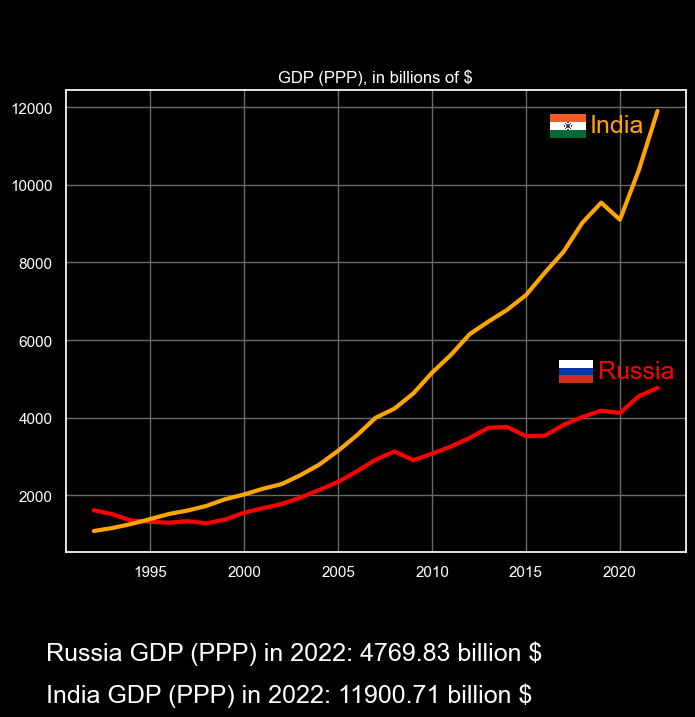

In [461]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.plot(rus_gdp.index, rus_gdp, linewidth=3, label="Russia", color="red")
ax.plot(ind_gdp.index, ind_gdp, linewidth=3, label="India", color="orange")
ax.title.set_color('white')

img = plt.imread('rus.png')
imagebox = OffsetImage(img, zoom=0.03)
rusim = AnnotationBbox(imagebox, (0.72, 0.365 + 0.21), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)

img = plt.imread('ind.png')
imagebox = OffsetImage(img, zoom=0.02)
rusim = AnnotationBbox(imagebox, (0.71, 0.775 + 0.21), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)

fig.text(0.79, 0.4, 'Russia', color='red', fontsize=18)
fig.text(0.78, 0.81, 'India', color='orange', fontsize=18)

fig.text(0.1, -0.07, f'Russia GDP (PPP) in 2022: {rus_gdp[2022]} billion $', color='white', fontsize=18)
fig.text(0.1, -0.14, f'India GDP (PPP) in 2022: {ind_gdp[2022]} billion $', color='white', fontsize=18)

plt.title("GDP (PPP), in billions of $")
plt.grid(True, color='dimgrey')

plt.savefig("world_data.png", bbox_inches='tight')
plt.show()

In [425]:
rus_growth = ((rus_gdp.to_numpy()[1:] - rus_gdp.to_numpy()[:-1]) / rus_gdp.to_numpy()[:-1] - 1) * 100

ind_growth = ((ind_gdp.to_numpy()[1:] - ind_gdp.to_numpy()[:-1]) / ind_gdp.to_numpy()[:-1] - 1) * 100

In [462]:
rus_growth = ((rus_gdp.to_numpy()[1:] - rus_gdp.to_numpy()[:-1]) / rus_gdp.to_numpy()[:-1]) * 100

ind_growth = ((ind_gdp.to_numpy()[1:] - ind_gdp.to_numpy()[:-1]) / ind_gdp.to_numpy()[:-1]) * 100

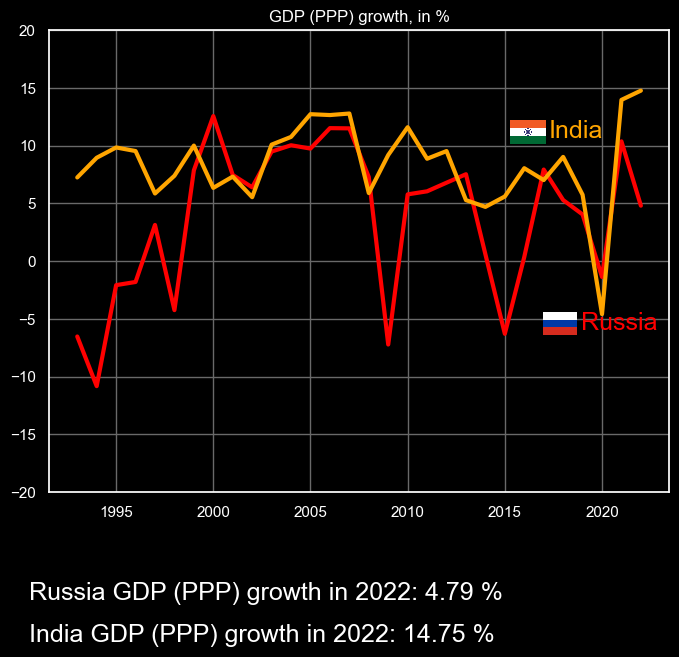

In [467]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.plot(rus_gdp.index[1:], rus_growth, linewidth=3, label="Russia", color="red")
ax.plot(ind_gdp.index[1:], ind_growth, linewidth=3, label="India", color="orange")
ax.title.set_color('white')

img = plt.imread('rus.png')
imagebox = OffsetImage(img, zoom=0.03)
rusim = AnnotationBbox(imagebox, (0.70, 0.365 + 0.21- 0.02), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)

img = plt.imread('ind.png')
imagebox = OffsetImage(img, zoom=0.02)
rusim = AnnotationBbox(imagebox, (0.69 - 0.03, 0.775 + 0.1), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)

ax.set_ylim(-20, 20)

fig.text(0.79, 0.4 - 0.02, 'Russia', color='red', fontsize=18)
fig.text(0.78- 0.03, 0.6 + 0.1, 'India', color='orange', fontsize=18)

fig.text(0.1, -0.07, f'Russia GDP (PPP) growth in 2022: {rus_growth[-1]:.2f} %', color='white', fontsize=18)
fig.text(0.1, -0.14, f'India GDP (PPP) growth in 2022: {ind_growth[-1]:.2f} %', color='white', fontsize=18)

plt.title("GDP (PPP) growth, in %")
plt.grid(True, color='dimgrey')

plt.savefig("world_data_growth.png", bbox_inches='tight')
plt.show()

In [447]:
rus_gdp = df[(df["Country"] == "Russia") & (df["WEO Subject Code"] == "NGDPD")].loc[:, 1992:2022].iloc[0, :]

ind_gdp = df[(df["Country"] == "India") & (df["WEO Subject Code"] == "NGDPD")].loc[:, 1992:2022].iloc[0, :]

ind_gdp = ind_gdp.str.replace(",", "")

ind_gdp = ind_gdp.astype(float)

rus_gdp = rus_gdp.str.replace(",", "")

rus_gdp = rus_gdp.astype(float)

import seaborn as sns

import numpy as np

ind_gdp.to_numpy()

ind_gdp.index.to_numpy()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=object)

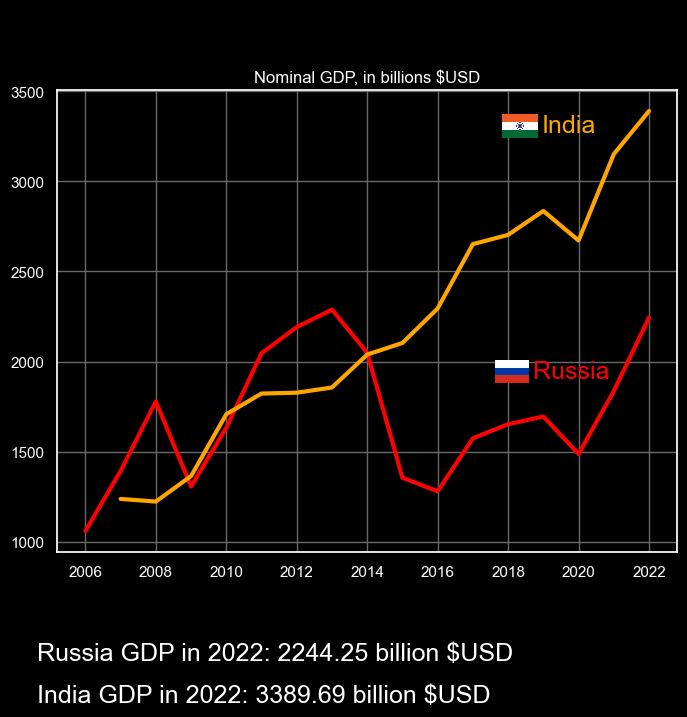

In [448]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.plot(rus_gdp.index, rus_gdp, linewidth=3, label="Russia", color="red")
ax.plot(ind_gdp.index, ind_gdp, linewidth=3, label="India", color="orange")
ax.title.set_color('white')

img = plt.imread('rus.png')
imagebox = OffsetImage(img, zoom=0.03)
rusim = AnnotationBbox(imagebox, (0.64, 0.365 + 0.21), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)

img = plt.imread('ind.png')
imagebox = OffsetImage(img, zoom=0.02)
rusim = AnnotationBbox(imagebox, (0.65, 0.775 + 0.21), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)

fig.text(0.72, 0.4, 'Russia', color='red', fontsize=18)
fig.text(0.73, 0.81, 'India', color='orange', fontsize=18)

fig.text(0.1, -0.07, f'Russia GDP in 2022: {rus_gdp[2022]} billion $USD', color='white', fontsize=18)
fig.text(0.1, -0.14, f'India GDP in 2022: {ind_gdp[2022]} billion $USD', color='white', fontsize=18)

plt.title("Nominal GDP, in billions $USD")
plt.grid(True, color='dimgrey')

plt.savefig("world_data_nom.png", bbox_inches='tight')
plt.savefig("world_data_nom.pdf", bbox_inches='tight')
plt.show()

In [449]:
rus_growth = ((rus_gdp.to_numpy()[1:] - rus_gdp.to_numpy()[:-1]) / rus_gdp.to_numpy()[:-1]) * 100

ind_growth = ((ind_gdp.to_numpy()[1:] - ind_gdp.to_numpy()[:-1]) / ind_gdp.to_numpy()[:-1]) * 100

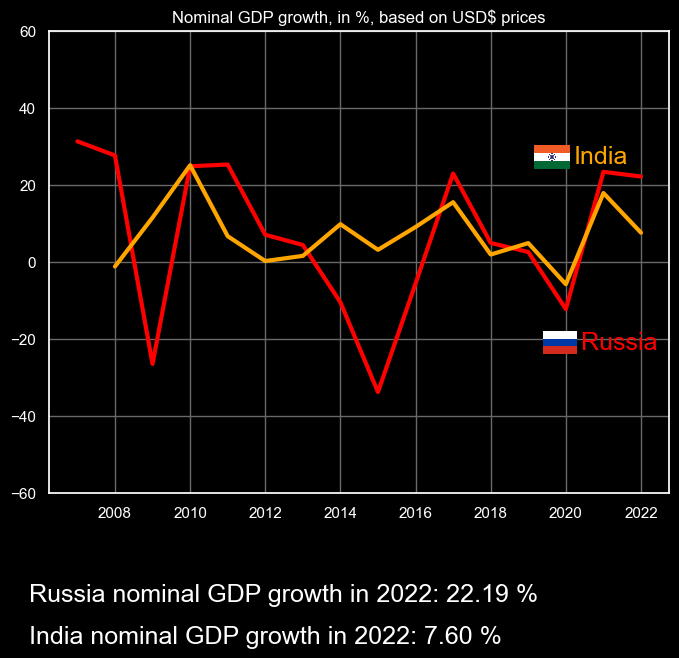

In [451]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.plot(rus_gdp.index[1:], rus_growth, linewidth=3, label="Russia", color="red")
ax.plot(ind_gdp.index[1:], ind_growth, linewidth=3, label="India", color="orange")
ax.title.set_color('white')

img = plt.imread('rus.png')
imagebox = OffsetImage(img, zoom=0.03)
rusim = AnnotationBbox(imagebox, (0.70, 0.365 + 0.16), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)

img = plt.imread('ind.png')
imagebox = OffsetImage(img, zoom=0.02)
rusim = AnnotationBbox(imagebox, (0.69, 0.775 + 0.06), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)

ax.set_ylim(-60, 60)

fig.text(0.79, 0.35, 'Russia', color='red', fontsize=18)
fig.text(0.78, 0.66, 'India', color='orange', fontsize=18)

fig.text(0.1, -0.07, f'Russia nominal GDP growth in 2022: {rus_growth[-1]:.2f} %', color='white', fontsize=18)
fig.text(0.1, -0.14, f'India nominal GDP growth in 2022: {ind_growth[-1]:.2f} %', color='white', fontsize=18)

plt.title("Nominal GDP growth, in %, based on USD$ prices")
plt.grid(True, color="dimgrey")

plt.savefig("world_data_nom_growth.png", bbox_inches='tight')
plt.savefig("world_data_nom_growth.pdf", bbox_inches='tight')
plt.show()

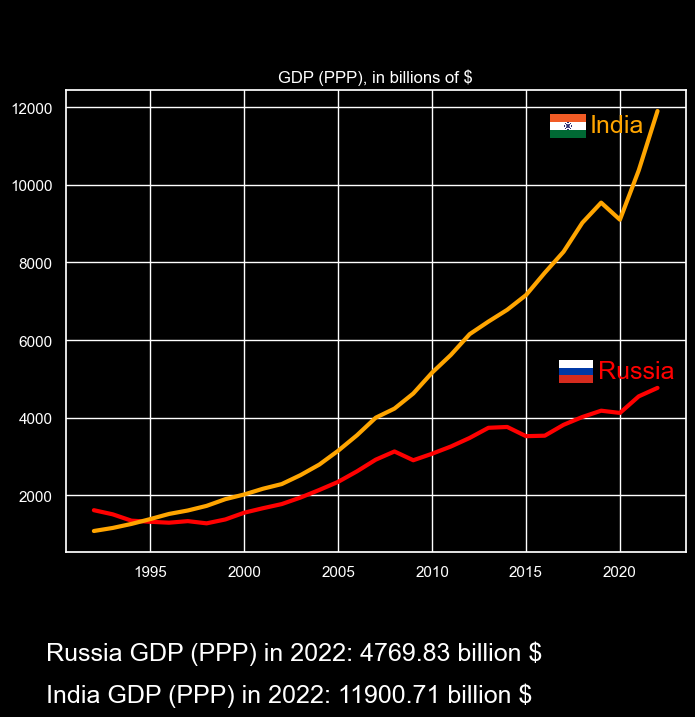

In [384]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.plot(rus_gdp.index, rus_gdp, linewidth=3, label="Russia", color="red")
ax.plot(ind_gdp.index, ind_gdp, linewidth=3, label="India", color="orange")
ax.title.set_color('white')

img = plt.imread('rus.png')
imagebox = OffsetImage(img, zoom=0.03)
rusim = AnnotationBbox(imagebox, (0.72, 0.365 + 0.21), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)

img = plt.imread('ind.png')
imagebox = OffsetImage(img, zoom=0.02)
rusim = AnnotationBbox(imagebox, (0.71, 0.775 + 0.21), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)

fig.text(0.79, 0.4, 'Russia', color='red', fontsize=18)
fig.text(0.78, 0.81, 'India', color='orange', fontsize=18)

fig.text(0.1, -0.07, f'Russia GDP (PPP) in 2022: {rus_gdp[2022]} billion $', color='white', fontsize=18)
fig.text(0.1, -0.14, f'India GDP (PPP) in 2022: {ind_gdp[2022]} billion $', color='white', fontsize=18)

plt.title("GDP (PPP), in billions of $")
plt.grid(True)

plt.savefig("world_data.png", bbox_inches='tight')
plt.show()